In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [34]:
# Load dataset
df = pd.read_csv("emails.csv")


In [35]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [36]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [37]:
X = df.iloc[:,1:3001]  # word frequency features
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [38]:
Y = df.iloc[:,-1].values # 1 = spam, 0 = not spam
Y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

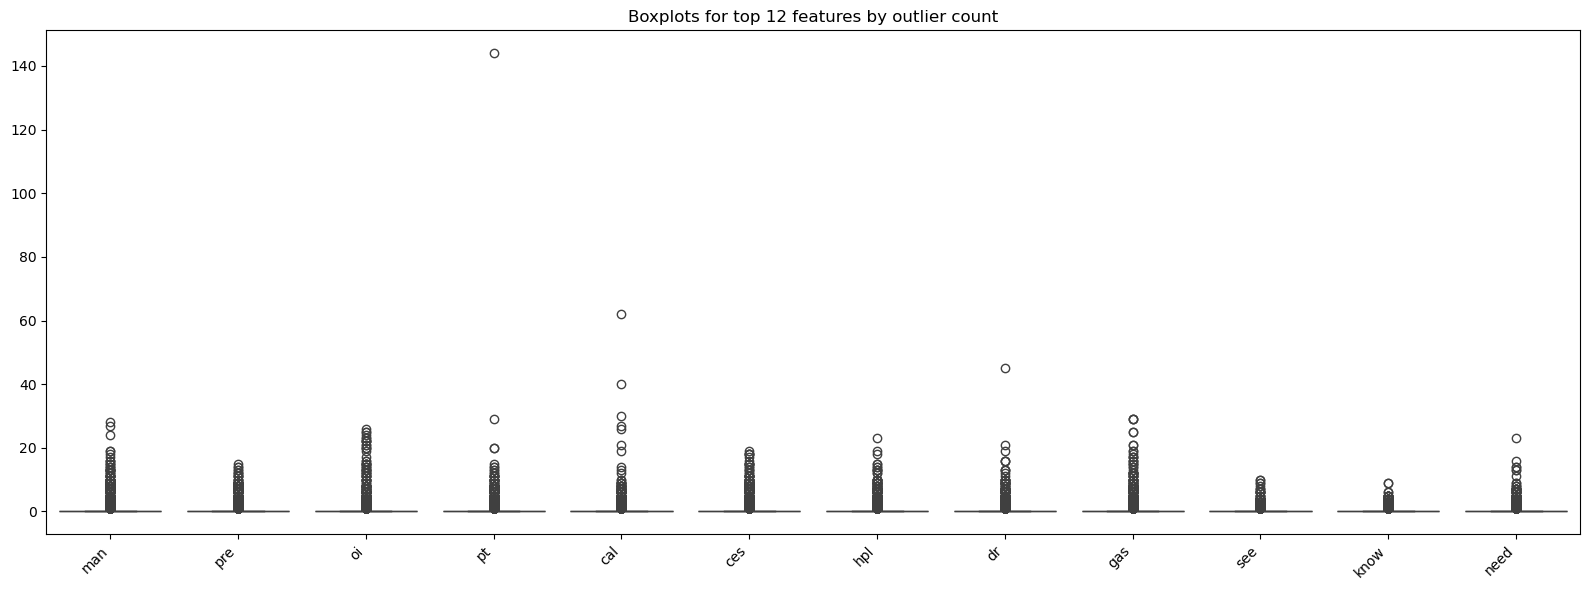

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])
# Compute IQR for each numeric column
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
# Define lower and upper bounds for outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
# Create outlier mask
outlier_mask = (df_numeric < lower) | (df_numeric > upper)
# Count number of outliers per feature
outlier_counts = outlier_mask.sum().sort_values(ascending=False)
# Pick top N features with most outliers
topN = 12
top_features = outlier_counts.head(topN).index.tolist()
# Plot boxplots
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_numeric[top_features])
plt.title(f"Boxplots for top {topN} features by outlier count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [40]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)



In [41]:
from sklearn.metrics import classification_report, confusion_matrix
# -------- Support Vector Machine --------
svc = SVC(C=1.0, kernel='rbf', gamma='auto')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [42]:
print("SVM Accuracy:", accuracy_score(y_test, svc_pred))
print("SVM Classification Report:\n", classification_report(y_test, svc_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svc_pred))


SVM Accuracy: 0.8932714617169374
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       913
           1       0.87      0.74      0.80       380

    accuracy                           0.89      1293
   macro avg       0.89      0.85      0.87      1293
weighted avg       0.89      0.89      0.89      1293

SVM Confusion Matrix:
 [[872  41]
 [ 97 283]]


In [43]:
# -------- K-Nearest Neighbors --------
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [44]:
print("KNN Accuracy:", knn.score(X_test, y_test))
print("KNN Classification Report:\n", classification_report(y_test, knn_pred))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))

KNN Accuracy: 0.8662026295436969
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       913
           1       0.74      0.84      0.79       380

    accuracy                           0.87      1293
   macro avg       0.83      0.86      0.85      1293
weighted avg       0.87      0.87      0.87      1293

KNN Confusion Matrix:
 [[799 114]
 [ 59 321]]


In [45]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
# Example: Split your data (replace 'df' and 'target_column' with your actual names)
# X = df.drop('target_column', axis=1)
# y = df['target_column']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Standardize the features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
# List of k values to test
ks = [1, 3, 5]
# Dictionary to store results
results = {}
# Loop through different k values
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train_s, y_train)
    y_pred = knn.predict(X_test_s)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    results[k] = acc
    print(f"\nK = {k}:")
    print(f"  Accuracy = {acc:.4f}")
    print("  Confusion Matrix:")
    print(cm)
    print("  Classification Report:")
    print(report)
# Optional: show best K value
best_k = max(results, key=results.get)
print(f"\n Best K = {best_k} with Accuracy = {results[best_k]:.4f}")


K = 1:
  Accuracy = 0.9026
  Confusion Matrix:
[[819  94]
 [ 32 348]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       913
           1       0.79      0.92      0.85       380

    accuracy                           0.90      1293
   macro avg       0.87      0.91      0.89      1293
weighted avg       0.91      0.90      0.90      1293


K = 3:
  Accuracy = 0.8639
  Confusion Matrix:
[[758 155]
 [ 21 359]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       913
           1       0.70      0.94      0.80       380

    accuracy                           0.86      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.89      0.86      0.87      1293


K = 5:
  Accuracy = 0.8345
  Confusion Matrix:
[[716 197]
 [ 17 363]]
  Classification Report:
              precision    recall  f1-score   support

   